In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import math

from datetime import datetime

In [5]:
bitInfo = pd.read_csv("/Users/wzjbatman/Downloads/Bitfinex_BTCEUR_trades_2018_02_02.csv")

In [6]:
bitInfo['date'] = bitInfo['date'].apply(lambda x: datetime.fromtimestamp(x/1000))
# bitInfo.set_index('date', inplace = True)
# bitInfo.sort_index(ascending = True, inplace = True)
# type(bitInfo.index.values[0])

In [8]:
# fisher transform function
def fish_func(dataFrame):
    df_price = dataFrame["price"]
    df_norm = (df_price - df_price.mean()) / (df_price.max() - df_price.min())
    dataFrame["fisher_Transform"] = np.arctanh(df_norm)

In [9]:

# mid = df_norm.min() + (df_norm.max() - df_norm.min()) / 2
# df_diff = df_norm - mid
# print(df_diff)
# test = (2 * math.exp(df_diff) - 1) / (2 * math.exp(df_diff) + 1)
# print(test)

In [13]:
fish_func(bitInfo)
print(bitInfo["fisher_Transform"])

0        0.427178
1        0.433229
2        0.433229
3        0.433133
4        0.419842
5        0.420314
6        0.434805
7        0.437079
8        0.434566
9        0.419558
10       0.430368
11       0.429223
12       0.429223
13       0.425660
14       0.415030
15       0.420924
16       0.415618
17       0.414475
18       0.414569
19       0.416262
20       0.415415
21       0.414569
22       0.415415
23       0.441880
24       0.415705
25       0.415705
26       0.415697
27       0.409598
28       0.382995
29       0.369549
           ...   
15685    0.208570
15686    0.208486
15687    0.208486
15688    0.208269
15689    0.210823
15690    0.205154
15691    0.197252
15692    0.197252
15693    0.197252
15694    0.197252
15695    0.197252
15696    0.187677
15697    0.187677
15698    0.180368
15699    0.179624
15700    0.197383
15701    0.197176
15702    0.197900
15703    0.202250
15704    0.208372
15705    0.208165
15706    0.198935
15707    0.198935
15708    0.182528
15709    0

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


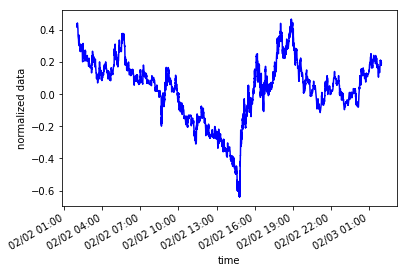

In [14]:
# myDates = [matplotlib.dates.date2num(i) for i in bitInfo['date']]
# plt.plot_date(myDates, fisher_Transform, color = "blue")
plt.plot(bitInfo['date'], bitInfo["fisher_Transform"], color = "blue")
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%m/%d %H:%M');
ax = plt.axes();
ax.xaxis.set_major_formatter(myFmt);
plt.xlabel("time")
plt.ylabel("normalized data")
plt.show()